In [125]:
import pandas as pd 
import numpy as np
import re 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 


pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
# pd.set_option('display.max_colwidth', None)
df = pd.read_csv('/Users/davidrex/KAGGLE/hogwarts_legacy_reviews.csv')
df['idx'] = df.index


In [126]:
df['Review'].str.match(r'(Incredible)').sum()

116

# Categorizing the negative reviews

In [127]:
neg_df = df[df['Feedback'] == 'Negative']
pos_df = df[df['Feedback'] == 'Positive']

In [128]:
# what would be good to obtain, is the review and the hours played
## so let's start by isolating the comments but hours played - people who've played the longest may have the better feedback

# Mean playtime per category of feedback

# 1/ Negative feedback

In [129]:
print(f"The mean play time for those who negative reviews was {round(neg_df['Playtime'].mean(),2)} hours")

The mean play time for those who negative reviews was 7.87 hours


In [130]:

print(f"The max time someone played that had a negative feedback was {neg_df['Playtime'].max()} hours, so that is definitely a feedback we'd take into account")
print(f"The min time someone played that had a negative feedback was {neg_df['Playtime'].min()} hours, ie less than an hour")


The max time someone played that had a negative feedback was 69 hours, so that is definitely a feedback we'd take into account
The min time someone played that had a negative feedback was 0 hours, ie less than an hour


In [131]:
# let's isolate the highest playing times
neg_rev_highest_hours =  neg_df[neg_df['Playtime'] >= 40]
neg_rev_lowest_hours = neg_df[neg_df['Playtime'] < 40]

# this was necessary because some elements in the review section were intergers 
neg_rev_lowest_hours['Review'] = neg_rev_lowest_hours['Review'].astype(str)


/var/folders/4y/3p248ngs2790s3zw19p7l4vc0000gn/T/ipykernel_46693/3596104798.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_rev_lowest_hours['Review'] = neg_rev_lowest_hours['Review'].astype(str)


In [163]:
list_neg_words = ("[bB]ad", "[tT]errible", "[hH]orrible", "[bB]oring", "[sS]low", 
                  "[bB]land", "[rR]epetitive", "[hH]ard", "[gG]ameplay", "[gG]litch", "[sS]tory", "[bB]ut", "[lL]ong")
#"[hH]arry", "[vV]oldemort", "[vV]illain", "[fF]oe+", "[wW]and", "[dD]ragon",

for ele in list_neg_words:
    regex = r'({})'.format(ele)
    matches = neg_rev_highest_hours['Review'].str.findall(regex).sum()
    print(f"{matches[0]}: {len(matches)}x")



bad: 15x
terrible: 1x
horrible: 5x
boring: 13x
slow: 2x
bland: 1x
repetitive: 8x
hard: 20x
gameplay: 8x
glitch: 4x
story: 63x
but: 92x
long: 13x


# For players with less than 40hours gametime but negative feedback

In [161]:
list_neg_words_2 = ("[bB]ad", "[tT]errible", "[hH]orrible", "[bB]oring", "[sS]low", 
                  "[bB]land", "[rR]epetitive", "[hH]ard", "[gG]ameplay", "[gG]litch", "[lL]ong", "[fF]ormulaic", "[tT]iresome", "[bB]raindead", "[wW]orst", "[bB]itter", "[cC]ould've")
#"1/10", "2/10", "3/10", "4/10", "5/10", "6/10", "7/10" ,"[bB]ut", "[hH]arry", "[vV]oldemort", "[vV]illain","[fF]oe+", "[wW]and", "[dD]ragon", "[gG]litch", "[sS]tory", , "[Mm]alfoy", "[sS]lytherin", 
for ele in list_neg_words_2:
    regex_x = r'({})'.format(ele)
    matches_y = neg_rev_lowest_hours['Review'].str.findall(regex_x).sum()
    print(f"{matches_y[0]}: {len(matches_y)}x")

bad: 570x
terrible: 189x
horrible: 131x
Boring: 303x
slow: 93x
bland: 68x
repetitive: 119x
hard: 314x
gameplay: 286x
glitch: 105x
long: 235x
formulaic: 7x
tiresome: 2x
braindead: 4x
worst: 91x
bitter: 7x
could've: 10x


# 2/ Positive feedback


In [134]:
print(f"The mean play time for those who positive reviews was {round(pos_df['Playtime'].mean(),2)} hours."
      f"It is a given though that those who enjoy the game will play more than those who don't.")

The mean play time for those who positive reviews was 11.78 hours.It is a given though that those who enjoy the game will play more than those who don't.


## For players who have +40hours gametime

In [154]:
# let's isolate the highest playing times
pos_rev_highest_hours =  pos_df[pos_df['Playtime'] >= 40]

list_pos_words = ("[gG]ood", "[gG]reat", "[aA]mazing", "[wW]onderful", "[mM]agical",
                   "[sS]uper", "[eE]xcellent", "[bB]est", "[sS]uperb", "[fF]antastic", "[gG]rand", "[sS]olid", "[Pp]erfect")

#"10/10", "9/10", "8/10", "7/10", "[hH]ogwarts",

for exe in list_pos_words:
    reg = r'({})'.format(exe)
    matches_x = pos_rev_highest_hours['Review'].str.findall(reg).sum()
    print(f"{matches_x[0]}: {len(matches_x)}x")
    

good: 78x
great: 107x
amazing: 75x
wonderful: 3x
magical: 9x
Super: 10x
Excellent: 12x
best: 56x
superb: 1x
Fantastic: 21x
Grand: 1x
solid: 8x
perfect: 6x


# For players who have less than 40hours gametime

In [155]:
pos_rev_lowest_hours =  pos_df[pos_df['Playtime'] < 40]

for exe in list_pos_words:
    reg = r'({})'.format(exe)
    matches_x = pos_rev_lowest_hours['Review'].str.findall(reg).sum()
    print(f"{matches_x[0]}: {len(matches_x)}x")


Good: 5545x
Great: 5152x
amazing: 4038x
wonderful: 292x
magical: 509x
super: 463x
Excellent: 342x
best: 2594x
Superb: 57x
Fantastic: 846x
grand: 17x
Solid: 359x
perfect: 526x


# Creating a dataframe of positive comments for playtime < 40hours

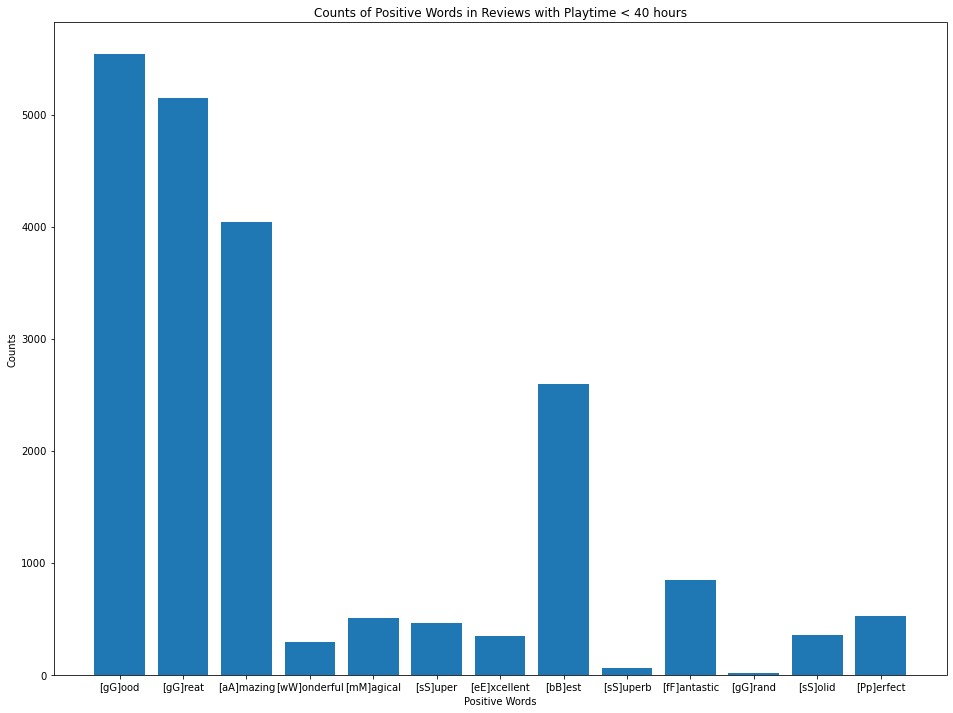

In [159]:
# first we created a dictionary 
matches_dict_pos_lowest = {'Word': [], 'Count': []}

# then we had to put the words and the counts in the dictionary
for exe in list_pos_words:
    reg = r'({})'.format(exe)
    matches_x = pos_rev_lowest_hours['Review'].str.findall(reg).sum()
    matches_dict_pos_lowest['Word'].append(exe)
    matches_dict_pos_lowest['Count'].append(len(matches_x))

# then i had to create my dataframe
df_pos_low = pd.DataFrame(matches_dict_pos_lowest)

## and this was the plotting part 

# set the figure size
plt.figure(figsize=(16, 12))

# create a bar plot of the counts
plt.bar(df_pos_low['Word'], df_pos_low['Count'])

# add labels and title
plt.xlabel('Positive Words')
plt.ylabel('Counts')
plt.title('Counts of Positive Words in Reviews with Playtime < 40 hours')

# display the plot
plt.show()



# Creating Bar Plot for player reviews with +40 hours playing time

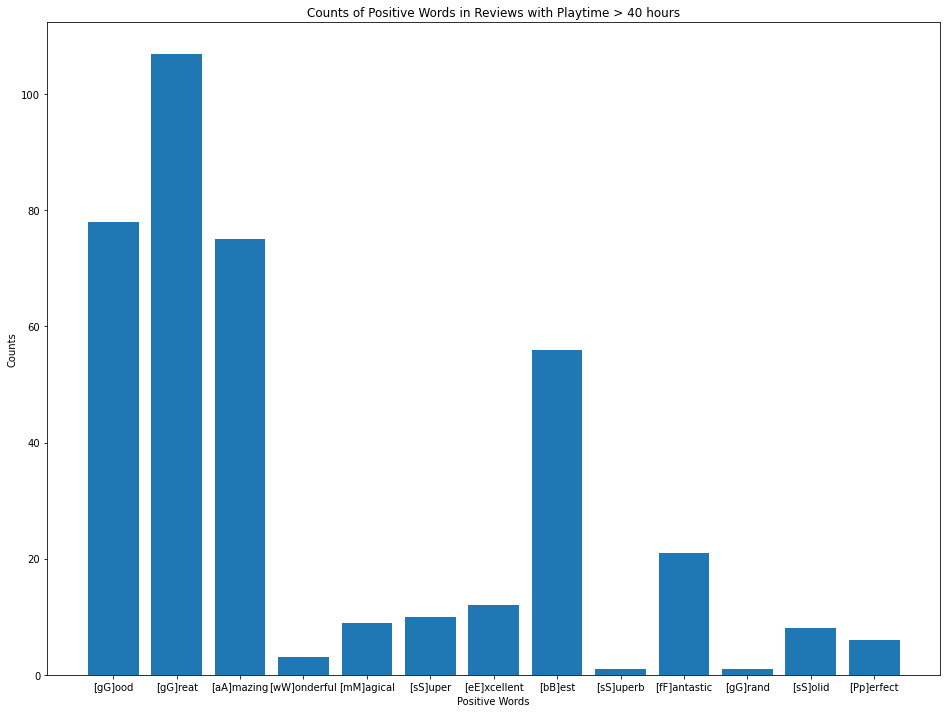

In [170]:
matches_dict_pos_highest = {'Word': [], 'Count': []}

for exe in list_pos_words:
    reg = r'({})'.format(exe)
    matches_x = pos_rev_highest_hours['Review'].str.findall(reg).sum()
    matches_dict_pos_highest['Word'].append(exe)
    matches_dict_pos_highest['Count'].append(len(matches_x))

df_pos_high = pd.DataFrame(matches_dict_pos_highest)


# set the figure size
plt.figure(figsize=(16, 12))

# create a bar plot of the counts
plt.bar(df_pos_high['Word'], df_pos_high['Count'])

# add labels and title
plt.xlabel('Positive Words')
plt.ylabel('Counts')
plt.title('Counts of Positive Words in Reviews with Playtime > 40 hours')

# display the plot
plt.show()

# Creating bar plots for people gave a negative review - both +40hours and -40hours

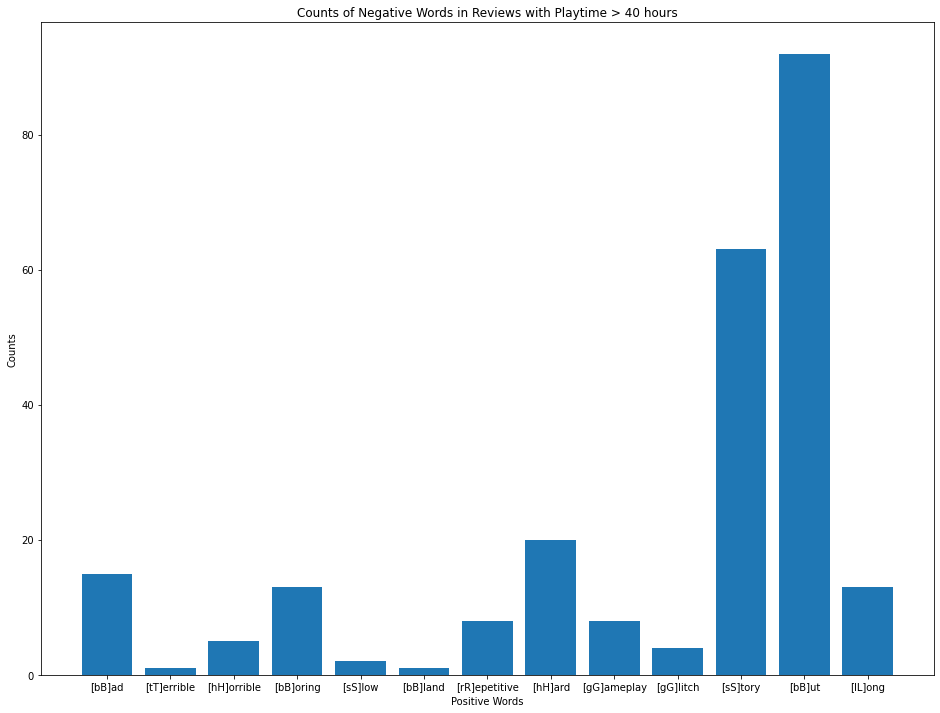

In [169]:
matches_dict_neg_highest = {'Word': [], 'Count': []}

for exe in list_neg_words:
    regex = r'({})'.format(exe)
    matches = neg_rev_highest_hours['Review'].str.findall(regex).sum()
    matches_dict_neg_highest['Word'].append(exe)
    matches_dict_neg_highest['Count'].append(len(matches))

df_neg_high = pd.DataFrame(matches_dict_neg_highest)


# set the figure size
plt.figure(figsize=(16, 12))

# create a bar plot of the counts
plt.bar(df_neg_high['Word'], df_neg_high['Count'])

# add labels and title
plt.xlabel('Positive Words')
plt.ylabel('Counts')
plt.title('Counts of Negative Words in Reviews with Playtime > 40 hours')

# display the plot
plt.show()

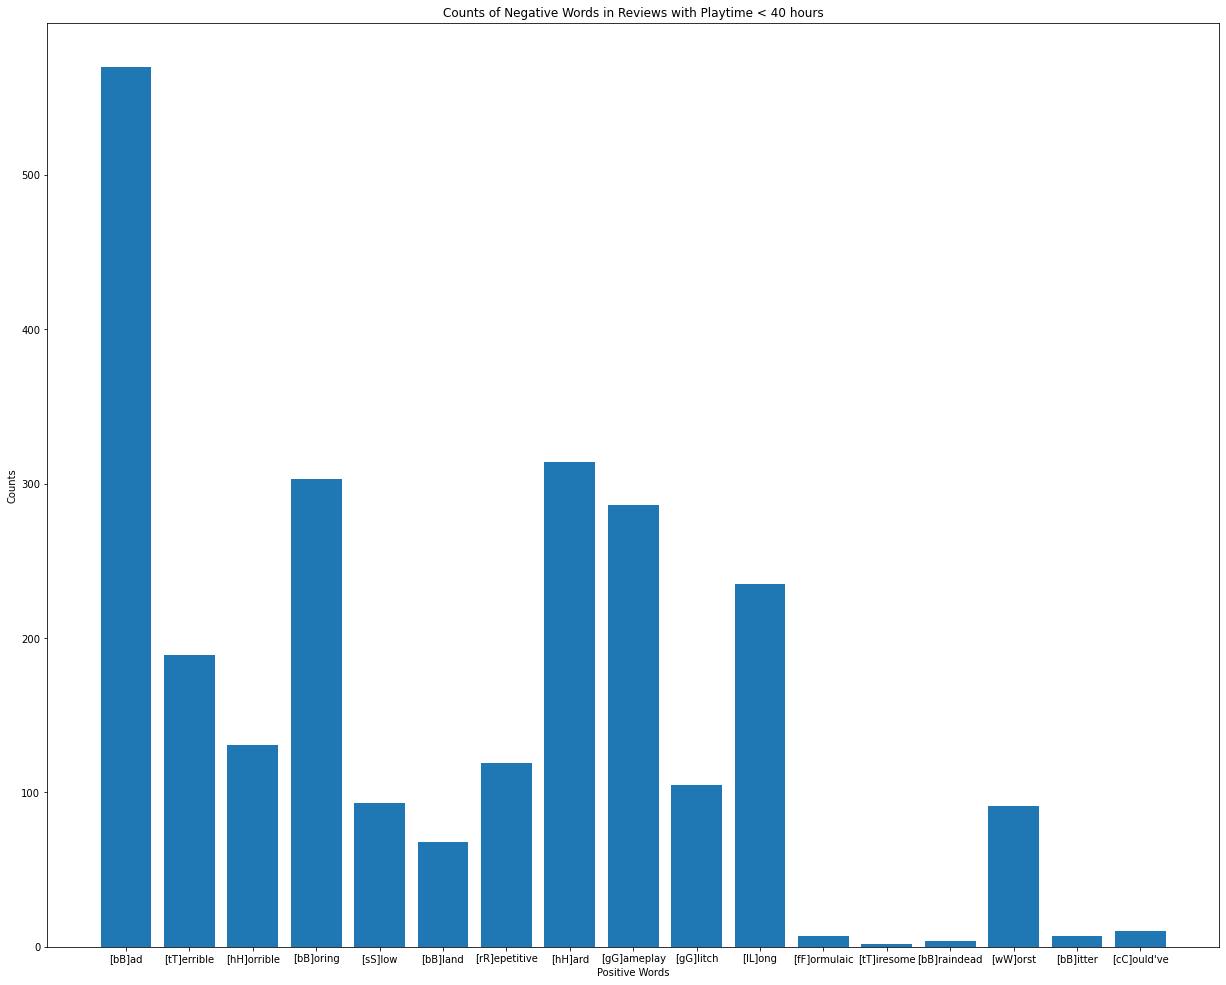

In [175]:
matches_dict_neg_lowest = {'Word': [], 'Count': []}

for exe in list_neg_words_2:
    regex = r'({})'.format(exe)
    matches = neg_rev_lowest_hours['Review'].str.findall(regex).sum()
    matches_dict_neg_lowest['Word'].append(exe)
    matches_dict_neg_lowest['Count'].append(len(matches))

df_neg_low = pd.DataFrame(matches_dict_neg_lowest)


# set the figure size
plt.figure(figsize=(21, 17))

# create a bar plot of the counts
plt.bar(df_neg_low['Word'], df_neg_low['Count'])

# add labels and title
plt.xlabel('Positive Words')
plt.ylabel('Counts')
plt.title('Counts of Negative Words in Reviews with Playtime < 40 hours')

# display the plot
plt.show()

# Reading review of highest playing gamer

In [138]:
pos_rev_highest_hours['Playtime'].max()
pd.set_option('display.max_colwidth', None)
pos_rev_highest_hours[pos_rev_highest_hours['Playtime'] == 122]['Review'].to_frame()

,Review
2893,IF YOUR NOT PLAYING! YOUR NOT LIVING!ONE OF THE BEST GAMES I PLAYED IN A DECADE!


# Reading review of highest playing gamer but with negative review

In [139]:
neg_rev_highest_hours['Playtime'].max()

neg_rev_highest_hours[neg_rev_highest_hours['Playtime'] == 69 ]['Review'].to_frame()

,Review
17204,"Lack of interaction with npc's, lack of content in general, story is boring and feels stretched. Great beginning however around halfway you can feel the dev's putting less and less effort. (just think of how hard they worked on the first hogsmeade mission and the intro to the game compared to end game content and ending). In general it feels like it missed so much potential for immersing ourselves into the universe, which is what it seemed to focus on in the begining seeing how much detail they put into hogwartz then a bit less in hogsmeade and then the rest of the world is basically empty. -no interaction with anyone unless they have a quest-no choices in the game at all even though it is hinted a few times that there are-minimal interactive elements (you cant even sit in a chair or get in your bed to sleep) im not asking to see potter take a crap. just enjoying a butter beer with a companion and do activities together like in gta 4 for example would be cool.-puzzles, puzzles and more puzzles.-elements like taking care of beats growing plants, brewing potions and learning the unforgivable are given really late in the game so you don't get to use them to their full potential.In general it feels like the team seemed inspired from how the game started but it felt like possibly half the content in the game had to be cancelled. for those saying i am asking too much. the real headscratcher is many games in the past have done much more for their games than was done for this game. looking back at the video's the dev's put out before release there's no wonder why they seemed to be so anxious about revealing anything about the game, it was just so shallow if they gave anything else away you would feel like there were no surprises.---{ Graphics }---☐ You forget what reality is☑ Beautiful☐ Good☐ Decent☐ Bad☐ Don‘t look too long at it☐ MS-DOS---{ Gameplay }---☐ Very good☐ Good☑ Its been done many times before☐ Mehh☐ Watch paint dry instead☐ Just don't---{ Audio }---☐ Eargasm☐ Very good☑ Good☐ Not too bad☐ Bad☐ I'm now deaf---{ Audience }---☐ Kids☑ Teens☑ Adults☐ Grandma---{ PC Requirements }---☐ Check if you can run paint☐ Potato☐ Decent☑ Fast☐ Rich boi☐ Ask NASA if they have a spare computer---{ Difficulty }---☐ Just press 'W'☐ Easy☑ Easy to learn / Hard to master☐ Significant brain usage☐ Difficult☐ Dark Souls---{ Grind }---☐ Nothing to grind☐ Only if u care about leaderboards/ranks☑ Isn't necessary to progress☐ Average grind level☐ Too much grind☐ You'll need a second life for grinding---{ Story }---☐ No Story☐ Some lore☑ Average☐ Good☐ Lovely☐ It'll replace your life---{ Game Time }---☐ Long enough for a cup of coffee☐ Short☑ Average☐ Long☐ To infinity and beyond---{ Price }---☐ It's free!☐ Worth the price☐ If it's on sale☑ If u have some spare money left☐ Not recommended☐ You could also just burn your money---{ Bugs }---☐ Never heard of☑ Minor bugs☐ Can get annoying☐ ARK: Survival Evolved☐ The game itself is a big terrarium for bugs---{ ? / 10 }---☐ 1☐ 2☐ 3☐ 4☐ 5☐ 6☑ 6.5☐7☐ 8☐ 9☐ 10Unless the dev's come out with a few quest dlc's and more content to explore and rp in the open would i cannot reccomend.Or unless you are a die hard harry potter fan like me but keep your expectations low or you might get sad halfway through."


# Getting comments from people who found the game 'boring' and gave a negative comment

In [140]:
#This is where input() would be interesting because we could add any word we like and see what the comments are


text_for = r"(could've)"
liste_com = []

for i in range(0,len(neg_rev_lowest_hours['Review'].str.extractall(text_for).index)):
    liste_com.append(neg_rev_lowest_hours['Review'].str.extractall(text_for).index[i][0])

for i in range(0, len(liste_com)):
    print('NEG COMMENT:', neg_rev_lowest_hours.loc[liste_com[i]]['Review'], '\n')
 

NEG COMMENT: I will start with - this is the first and last game I have ever pre-ordered. I was so hyped about the game after all these years - a Harry Potter game with modern graphics. I will point out the bad sides first. 1. The game is dashingly predictable. The story is boring (SPOILERS!!!), I am the ultra young hero that defeated and killed wizards with muuuch more experience than me. Sure. Booooring. 2. I start from 5th year and I miss all the fun from the beginning, all the spell learning, classes, etc. 3. Every single NPC besides the ones for the quests, feel like the training dummies I test my magic on. They do not feel living, they kinda just stay there, like cardboard characters. 4. This should must've been a MMORPG game, where we start from 1st year, learn, duel each other, form teams, eventually story unwinds that Hogwarts will be attacked eventually, we participate in different events where we learn newer and newer stuff, the years go by, we get better and better, whole g

# Comments of people who loved the game 

In [141]:
text_for = r"(superb)"
liste_com = []

for i in range(0,len(pos_rev_lowest_hours['Review'].str.extractall(text_for).index)):
    liste_com.append(pos_rev_lowest_hours['Review'].str.extractall(text_for).index[i][0])

for i in range(0, len(liste_com)):
    print('NEG COMMENT:', pos_rev_lowest_hours.loc[liste_com[i]]['Review'], '\n')

NEG COMMENT: Superg game, superb storyline 

NEG COMMENT: Superb game. Definitely for people already familiar with the Wizarding World, as a lot of the fun of the game is the exploration and a little bit of fan service. The game is superb and the combat and magic systems are very well designed. 10/10 to me! 

NEG COMMENT: Absolutely love this game.  They definitely have some glitches to smooth over, but the game is superb. 

NEG COMMENT: Playing this game is making me want to watch all the Harry Potter movies. Beautiful graphics, intriguing story, combat system is superb! 10/10 

NEG COMMENT: so far an absolutely amazing game with superb story line, plenty to explore, and a variety of enemies to hone your magic skills on. 

NEG COMMENT: This game has exceeded my expectations. Even the side quests are engaging. Voice acting is superb. Game mechanics really good.  For anyone that's a fan of Harry Potter it's a must play. 5/5 for me. 

NEG COMMENT: superb game 

NEG COMMENT: Amazing game 